In [2]:
!pip install hazm
!git lfs install
!git clone https://huggingface.co/HooshvareLab/gpt2-fa-poetry


  Obtaining dependency information for hazm from https://files.pythonhosted.org/packages/91/8c/cc3d01c27681eb8223781ea162a23f9926647ce864eb601a19aee4bce0af/hazm-0.10.0-py3-none-any.whl.metadata
  Using cached hazm-0.10.0-py3-none-any.whl.metadata (11 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 30.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 42.5 MB/s eta 0:00:00
  Obtaining dependency information for python-crfsuite<0.10.0,>=0.9.9 from https://files.pythonhosted.org/packages/38/1d/c475ba7d11e9735f00eb08e2f5315aa2e21c24cc85a0474c3fd425edef58/python_crfsuite-0.9.10-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 892.6/892.6 kB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 31.5 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.4
    Uninstalling nltk-3.2.4:
      Successfully uninstalled nltk-3.2.4
ER

In [42]:
import hazm 
from transformers import GPT2LMHeadModel, GPT2Tokenizer,AdamW, GPT2Config
from transformers import AutoTokenizer, AutoConfig, AutoModelWithLMHead
from torch.utils.data import Dataset, DataLoader, random_split

import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt


In [10]:
device = "cuda" if torch.cuda.is_available() else "cpu"


## Tokenizer

In [11]:
model_name = "HooshvareLab/gpt2-fa"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
configuration = GPT2Config.from_pretrained(model_name, output_hidden_states=False)
tokenizer.add_special_tokens({'pad_token': ''})  
tokenizer.pad_token = ''
normalizer = hazm.Normalizer(persian_numbers=False)


# tokenizer = AutoTokenizer.from_pretrained(model_name, bos_token='',eos_token='', pad_token='',unk_token='')
# tokenizer = GPT2Tokenizer.from_pretrained(model_name,  bos_token='',eos_token='', pad_token='',unk_token='')
# config = GPT2Tokenizer.from_pretrained(model_name)
# # print(tokenizer)
# tokenizer.add_special_tokens({"bos_token": '',"eos_token": '',"pad_token": '',"unk_token": ''})
# tokenizer.pad_token = ''
# # tokenizer.add_special_tokens({"bos_token": '',"eos_token": '',"pad_token": '',"unk_token": ''})

# normalizer = hazm.Normalizer(persian_numbers=False)
# # # print(tokenizer(""))
# # config = AutoConfig.from_pretrained(model_name,bos_token_id=tokenizer("")["input_ids"][0],
# #                                     eos_token_id=tokenizer("")["input_ids"],pad_token_id=tokenizer("")["input_ids"],
# #                                     unk_token_id=tokenizer("")["input_ids"])
# # # model = GPT2LMHeadModel.from_pretrained(model_name, config=config).to(device)


In [5]:
model_name_or_path = "HooshvareLab/gpt2-fa"
tokenizer = AutoTokenizer.from_pretrained(
        model_name_or_path,
        bos_token='',
        eos_token='',
        pad_token='',
        unk_token=''
    )
tokenizer.add_special_tokens({
    "bos_token": '',
    "eos_token": '',
    "pad_token": '',
    "unk_token": ''
})
normalizer = hazm.Normalizer(persian_numbers=False)

# tokenizer = AutoTokenizer.from_pretrained(
#     model_name_or_path,
#     bos_token='<s>', 
#     eos_token='</s>', 
#     pad_token='<pad>',
#     unk_token='<unk>'
# )

# tokenizer = AutoTokenizer.from_pretrained(
#         model_name_or_path,
#         bos_token='',
#         eos_token='',
#         pad_token='',
#         unk_token=''
#     )
# config = AutoConfig.from_pretrained(
#         model_name_or_path,
#         bos_token_id=tokenizer('')["input_ids"][0],
#         eos_token_id=tokenizer('')["input_ids"][0],
#         pad_token_id=tokenizer('')["input_ids"][0],
#         unk_token_id=tokenizer('')["input_ids"][0],
#     )

# tokenizer.add_special_tokens({
#         "bos_token": '',
#         "eos_token": '',
#         "pad_token": '',
#         "unk_token": ''
#     })
# tokenizer.add_special_tokens({
#     "bos_token": '</s>',
#     "eos_token": '</s>', 
#     "pad_token": '<pad>',
#     "unk_token": '<unk>'
# })

# config = AutoConfig.from_pretrained(
#     model_name_or_path,
#     bos_token_id=tokenizer("")["input_ids"][0], 
#     eos_token_id=tokenizer("")["input_ids"][0], 
#     pad_token_id=tokenizer("")["input_ids"][0],
#     unk_token_id=tokenizer("")["input_ids"][0],
# )


tokenizer_config.json:   0%|          | 0.00/728 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/808 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.16M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/875k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.75M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/14.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/104 [00:00<?, ?B/s]

In [12]:
file_path = '/kaggle/input/poet-dataset/ferdousi.txt'     
with open(file_path, 'r', encoding='utf-8') as f:
    lines = f.read().split('\n')
lines = lines[2:]

inputs = []
outputs = []
texts = []
for i in range(0, len(lines) - 3, 2):
    texts.append(normalizer.normalize(lines[i]) + '  ' + normalizer.normalize(lines[i + 1]) + '   ' + normalizer.normalize(lines[i + 2]) + '    ' + 
                 normalizer.normalize(lines[i + 3]) + '    ')

for i, beit in enumerate(lines):
    if i%4 == 0 :
        inputs.append( normalizer.normalize(beit) )
    elif i%4 == 1:
        inputs.append( normalizer.normalize(beit) )
    elif i%4 == 2:
        outputs.append( normalizer.normalize(beit) )
    else:
        outputs.append( normalizer.normalize(beit) )
inputs = inputs[:-1]
inputs = [f'{inputs[i]} {inputs[i + 1]}' for i in range(0, len(inputs)-1, 2)]
outputs = [f'{outputs[i]} {outputs[i + 1]}' for i in range(0, len(outputs)-1, 2)]



In [13]:
print('First verse of input', inputs[0])
print('First verse of output', outputs[0])

# tokenized_inputs = tokenizer(inputs, padding=True, truncation=True, return_tensors="pt")
# tokenized_outputs = tokenizer(outputs, padding=True, truncation=True, return_tensors="pt")

First verse of input به نام خداوند جان و خرد کزین برتر اندیشه برنگذرد
First verse of output خداوند نام و خداوند جای خداوند روزی‌ده رهنمای


## Dataset with three outputs (Verse, Attention Mask, Label)

In [15]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# Create a custom dataset class
class CustomDataset(Dataset):
    def __init__(self, input_texts, tokenizer):
#         self.len_texts = len(input_sequences['input_ids']
        self.tokenizer = tokenizer
        self.input_seq = []
        self.attn_masks = []
        self.output_seq = []
        
        for i in input_texts:
            inputs_enc = tokenizer(i,
                                               truncation=True,
                                               max_length=256,
                                               padding="max_length")
            
#             outputs_enc = tokenizer(outputs[i],
#                                                truncation=True,
#                                                max_length=256,
#                                                padding="max_length")
            self.input_seq.append(torch.tensor(inputs_enc['input_ids']))
            self.attn_masks.append(torch.tensor(inputs_enc['attention_mask']))
#             self.output_seq.append(torch.tensor(outputs_enc['input_ids']))
            
    def __len__(self):
        return len(self.input_seq)

    def __getitem__(self, idx):
        return self.input_seq[idx], self.attn_masks[idx]
#     , self.output_seq[idx]

dataset = CustomDataset(texts, tokenizer)

train_ratio = 0.75
train_size = int(len(dataset) * train_ratio)
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create data loaders
batch_size = 16
train_loader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size = batch_size)
test_loader = DataLoader(test_dataset, sampler=SequentialSampler(test_dataset), batch_size = batch_size)


print(f"Number of samples in the training set: {len(train_dataset)}")
print(f"Number of samples in the validation set: {len(test_dataset)}")


Number of samples in the training set: 37205
Number of samples in the validation set: 12402


In [16]:
import gc
torch.cuda.empty_cache()
# del model, org_image, changed_image, labels

gc.collect()


7

## Model and test before learning

In [33]:
model = GPT2LMHeadModel.from_pretrained(model_name, config =configuration,).to(device)
model.resize_token_embeddings(len(tokenizer))

Embedding(42001, 768)

**We show a batch of verse before learning**

In [32]:
import numpy as np

sample_input = inputs[np.random.randint(0, len(inputs))]
sample_input_ids = torch.tensor(tokenizer([sample_input])["input_ids"]).to(device)
# sample_input_ids = sample_input_ids.to('cpu')

sample_outputs = model.generate(
    input_ids=sample_input_ids,
    do_sample=True,
    top_k=50,
    max_length=50,
    top_p=0.95,
    num_return_sequences=1
)
print('Input Verse = ',sample_input)

# for i, sample_output in enumerate(sample_outputs):
output = tokenizer.decode(sample_output, skip_special_tokens=False)
#     output = output.replace("<|startoftext|>", "\n").replace("", "").replace("", "").replace("", "\n")

print(f'Output Verse =  {output}')

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:5 for open-end generation.


Input Verse =  شما رنج بسیار برداشتید بر و بوم آباد بگذاشتید
Output Verse =: بروبرنیا برگرفت آفرین ستایش سزای جهان‌آفرین شد. هوروخوف در سال ۱۹۳۶ به شهر لنینگراد اعزام شد و در ۱۹۳۷ به ایالات متحده آمریکا مهاجرت کرد و سرانجام به‌عنوان استاد دانشگاه در دانشکدهٔ حقوق در دانشکدهٔ حقوق و


## Learning Part ##

In [34]:
# AdamW is a class from the huggingface library, it is the optimizer we will be using, and we will only be instantiating it with the default parameters.
optimizer = AdamW(
    model.parameters(),
    lr=5e-4,
    eps=1e-8
)
# optimizer = torch.optim.RMSprop(
#     model.parameters(),
#     lr=5e-5,
#     alpha=0.99,
#     eps=1e-8,
#     centered=False,
# )


num_epochs = 10
train_losses = []
val_losses = []
for epoch in range(num_epochs):
    ################ Train Part ################
    model.train()

    train_loss = 0.0
    for input_datas, attn_datas in train_loader:

        input_data = input_datas[0].to(device)
        output_data = input_datas[0].to(device)
        attn_data = attn_datas[0].to(device)
#         output_data = output_data.to(device)

#         optimizer.zero_grad()
        model.zero_grad()
        generated_data  = model(input_ids = input_data,
                                attention_mask = attn_data,
                                labels = output_data, token_type_ids=None )

        loss = generated_data[0]
        train_loss += loss.item()
        loss.backward()
        optimizer.step()
        

    avg_loss = train_loss/len(train_loader)
    train_losses.append(avg_loss)
    
    ################ Test Part ################
    
    model.eval()
    val_loss = 0
    for input_vals, attn_vals in test_loader:

        input_val = input_vals[0].to(device)
        output_val = input_vals[0].to(device)
        attn_val = attn_vals[0].to(device)
#         output_val = output_val.to(device)
        
        generated_val  = model(input_ids = input_val,
                                attention_mask = attn_val,
                                labels = output_val, token_type_ids=None )
        
        loss = generated_val[0]
        val_loss += loss.item()
        
    val_avg_loss = val_loss/len(test_loader)    
    val_losses.append(val_avg_loss)
    print(f"Epoch {epoch + 1}/{num_epochs}, Average Training Loss: {avg_loss}",
        f"Epoch {epoch + 1}/{num_epochs}, Average Validation Loss: {val_avg_loss}")
        
    

Epoch 1/10, Average Training Loss: 0.6735185253420269 Epoch 1/10, Average Validation Loss: 0.5949755824871898
Epoch 2/10, Average Training Loss: 0.5750884366055962 Epoch 2/10, Average Validation Loss: 0.560202932273297
Epoch 3/10, Average Training Loss: 0.551058044014875 Epoch 3/10, Average Validation Loss: 0.5399653419813851
Epoch 4/10, Average Training Loss: 0.5325101772107037 Epoch 4/10, Average Validation Loss: 0.523673982618703
Epoch 5/10, Average Training Loss: 0.51337343273702 Epoch 5/10, Average Validation Loss: 0.507453506946871
Epoch 6/10, Average Training Loss: 0.4974957581798475 Epoch 6/10, Average Validation Loss: 0.49873920718265563
Epoch 7/10, Average Training Loss: 0.4843098213151418 Epoch 7/10, Average Validation Loss: 0.4893166447615193
Epoch 8/10, Average Training Loss: 0.47363232559847196 Epoch 8/10, Average Validation Loss: 0.47782917942890185
Epoch 9/10, Average Training Loss: 0.46732516736048413 Epoch 9/10, Average Validation Loss: 0.47412536124285964
Epoch 10/10

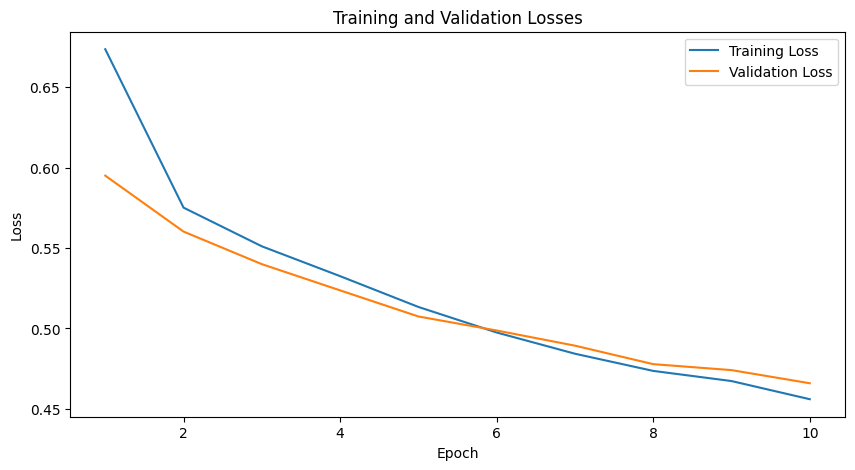

In [38]:
# Plotting the losses
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.title('Training and Validation Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Generate Some Verses

We wil see how differences can our model make after learning and compare it in the report with previous

In [40]:

for _ in range(10):
    input_sample = inputs[np.random.randint(0, len(inputs))]

    # Change sample_input_ids to input_ids
    input_ids = torch.tensor(tokenizer([input_sample])["input_ids"])
    input_ids = input_ids.to(device)

    # Change sample_outputs to generated_sequences
    generated_sequences = model.generate(
        input_ids=input_ids,
        do_sample=True,
        top_k=50,
        max_length=50,
        top_p=0.95,
        num_return_sequences=1
    )
    print('Input Verse = ', input_sample)

    # Update variable names in the loop as well
    for i, generated_sequence in enumerate(generated_sequences):
        out = tokenizer.decode(generated_sequence, skip_special_tokens=False)
        print('Output Verse = ', out)


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:5 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:5 for open-end generation.


Input Verse =  ز لشکر نیارست دم زد کسی نبد خود دران شهر مردم بسی
Output Verse =  ز لشکر نیارست دم زد کسی نبد خود دران شهر مردم بسی  چنان شد که بد مردم از نخست آفرین    ابا دشمن و دادگر    <|endoftext|>


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:5 for open-end generation.


Input Verse =  چو هر سه مه اندر عماری نشست ز رومی همان خادم آورد شست
Output Verse =  چو هر سه مه اندر عماری نشست ز رومی همان خادم آورد شست   ز گستردنیها به ایرانیان را به چنگ    فرود آمد از شاه گردن‌فراز و تنگ    <|endoftext|>


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:5 for open-end generation.


Input Verse =  فرستاده گوید که سالار گفت که این راز پیدا کنید از نهفت
Output Verse =  فرستاده گوید که سالار گفت که این راز پیدا کنید از نهفت  بر آن لشکر از ما نهفت   کنون اکنون که تا من ز ایران نهفت    نه از تو نهفت    <|endoftext|>


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:5 for open-end generation.


Input Verse =  همه دشت نخچیر و مرغ اندر آب اگر دیر مانی بگیرد شتاب
Output Verse =  همه دشت نخچیر و مرغ اندر آب اگر دیر مانی بگیرد شتاب  چنان دان که چون سندروس    ز گفتار بی‌نامداران سپهر    <|endoftext|>


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:5 for open-end generation.


Input Verse =  گر ایدونک من بدسگالم بدوی ز گیتی برآید یکی گفت و گوی
Output Verse =  گر ایدونک من بدسگالم بدوی ز گیتی برآید یکی گفت و گوی  چنین گفت شاه‌گر را ز هر سو فرستاد    به نزدیک شنگل فراوان فرستاد    <|endoftext|>


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:5 for open-end generation.


Input Verse =  بجویم یکی باره پیلتن بخواهم ز هر سو که هست انجمن
Output Verse =  بجویم یکی باره پیلتن بخواهم ز هر سو که هست انجمن  که چندین چه باید بدو بر زمین   که او سوی شیراوژن شدست    دلیران بدو نیمجوی    <|endoftext|>


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:5 for open-end generation.


Input Verse =  شهنشاه را دل بیاراستی می‌و رود و رامشگران خواستی
Output Verse =  شهنشاه را دل بیاراستی می‌و رود و رامشگران خواستی  ز هر گونه‌ای نامداری بیاراستند    به نخچیر کردن کمر ساختند    <|endoftext|>


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:5 for open-end generation.


Input Verse =  فرستاد با او یکی پرخرد که او را به نزدیک منذر برد
Output Verse =  فرستاد با او یکی پرخرد که او را به نزدیک منذر برد  دلش کار لشکر دو نیم کن    از ایران چو شد که ویران شد    <|endoftext|>


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:5 for open-end generation.


Input Verse =  نیابد کسی چاره از چنگ مرگ چو باد خزانست و ما همچو برگ
Output Verse =  نیابد کسی چاره از چنگ مرگ چو باد خزانست و ما همچو برگاشت  به شب اندر آرد بجایی که کرد    به گفتار بر تیره زندان و پوست کرد    <|endoftext|>
Input Verse =  ستانم یکی مهر خاقان چین چنان رو که اندر نوردی زمین
Output Verse =  ستانم یکی مهر خاقان چین چنان رو که اندر نوردی زمین  بروبر دگر روز و بشهر مهتری کهتری    که بر خسرو و مهتری نو مهتری    <|endoftext|>


In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!python -m nltk.downloader popular

In [43]:
from nltk.translate.bleu_score import sentence_bleu
from nltk.tokenize import word_tokenize

input_sample = texts[0]
similar_sample = 'نیابد کسی چاره از چنگ مرگ چو باد خزانست و ما همچو برگاشت  به شب اندر آرد بجایی که کرد    به گفتار بر تیره زندان و پوست کرد'

ref_token = word_tokenize(input_sample.lower())
can_token = word_tokenize(similar_sample.lower())
score = sentence_bleu(ref_token, can_token)

print(f"BLEU Score = {score}")



BLEU Score = 7.919883909890055e-232


/opt/conda/lib/python3.10/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/opt/conda/lib/python3.10/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/opt/conda/lib/python3.10/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

In [45]:
!pip install rouge


Recall-Oriented Understudy for Gisting Evaluation 

In [50]:
from rouge import Rouge
rouge = Rouge()

input_sample = texts[0]
similar_sample = 'نیابد کسی چاره از چنگ مرگ چو باد خزانست و ما همچو برگاشت  به شب اندر آرد بجایی که کرد    به گفتار بر تیره زندان و پوست کرد'

score = rouge.get_scores(input_sample, similar_sample)
print(f"Rouge Score = {score[0]['rouge-1']}")


Rouge Score = {'r': 0.08, 'p': 0.15384615384615385, 'f': 0.105263153393352}
